### initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
project_path = '/content/drive/My Drive/'

In [ ]:
import pandas as pd
batch_df=pd.DataFrame(columns=['batch size','GPU','GAcc','GLoss'])
batch_df['batch size']=[1024,512,256]
print(batch_df)

unit_df=pd.DataFrame(columns=['Units','GPU','GAcc','GLoss'])
unit_df['Units']=[8,16,32,64,128,256]
print(unit_df)

layer_df=pd.DataFrame(columns=['Layers','GPU','GAcc','GLoss'])
layer_df['Layers']=[2,3,4]
layer_df

   batch size  GPU GAcc GLoss
0        1024  NaN  NaN   NaN
1         512  NaN  NaN   NaN
2         256  NaN  NaN   NaN
   Units  GPU GAcc GLoss
0      8  NaN  NaN   NaN
1     16  NaN  NaN   NaN
2     32  NaN  NaN   NaN
3     64  NaN  NaN   NaN
4    128  NaN  NaN   NaN
5    256  NaN  NaN   NaN


,Layers,GPU,GAcc,GLoss
0,2,NaN,NaN,NaN
1,3,NaN,NaN,NaN
2,4,NaN,NaN,NaN


###Model

In [ ]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


In [ ]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.9.2'

In [ ]:
# Check if eager execution mode is on
tf.executing_eagerly()

True

In [ ]:
from tensorflow.keras.datasets import mnist
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
split = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(X_train.shape, y_train.shape, X_val.shape, y_val.shape))

x_train: (48000, 28, 28), y_train: (48000,), x_val: (12000, 28, 28), y_val: (12000,)


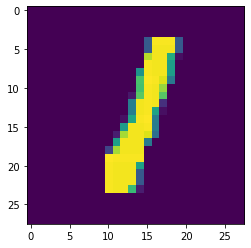

In [ ]:
#importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# Reshaping the data to fit the model
X_train = X_train.reshape(48000, 28, 28, 1)
X_val = X_val.reshape(12000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot= to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# batch size

## batch_size=1024

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 14s 61ms/step - loss: 2.1678 - accuracy: 0.7637 - val_loss: 0.2463 - val_accuracy: 0.9251
Epoch 2/10
47/47 [==============================] - 2s 41ms/step - loss: 0.1818 - accuracy: 0.9463 - val_loss: 0.1378 - val_accuracy: 0.9581
Epoch 3/10
47/47 [==============================] - 2s 41ms/step - loss: 0.1115 - accuracy: 0.9658 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 4/10
47/47 [==============================] - 2s 41ms/step - loss: 0.0759 - accuracy: 0.9779 - val_loss: 0.0879 - val_accuracy: 0.9719
Epoch 5/10
47/47 [==============================] - 2s 41ms/step - loss: 0.0580 - accuracy: 0.9828 - val_loss: 0.0751 - val_accuracy: 0.9764
Epoch 6/10
47/47 [==============================] - 2s 41ms/step - loss: 0.0476 - accuracy: 0.9862 - val_loss: 0.0745 - val_accuracy: 0.9770
Epoch 7/10
47/47 [==============================] - 2s 42ms/step - loss: 0.0406 - accuracy: 0.9882 - val_loss: 0.0694 - val_accuracy: 0.9794
Epoch 8/10
4

In [ ]:
print('Total training time {} seconds'.format(end - start))


Total training time 31.73024010658264 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)
batch_df['GPU'][batch_df['batch size']==1024]=round(end-start, 2)
batch_df['GAcc'][batch_df['batch size']==1024]=round(test_acc, 2)
batch_df['GLoss'][batch_df['batch size']==1024]=round(test_loss, 2)

layer_df['GPU'][layer_df['Layers']==2]=round(end-start, 2)
layer_df['GAcc'][layer_df['Layers']==2]=round(test_acc, 3)
layer_df['GLoss'][layer_df['Layers']==2]=round(test_loss, 3)

313/313 [==============================] - 1s 3ms/step - loss: 0.0668 - accuracy: 0.9815


<ipython-input-15-693f479ecfb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GPU'][batch_df['batch size']==1024]=round(end-start, 2)
<ipython-input-15-693f479ecfb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GAcc'][batch_df['batch size']==1024]=round(test_acc, 2)
<ipython-input-15-693f479ecfb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GLoss'][batch_df['batch size']==1024]=round(test_loss,

## batch_size=512

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=512, epochs=10)

end = time()

Epoch 1/10
94/94 [==============================] - 3s 28ms/step - loss: 1.3258 - accuracy: 0.8429 - val_loss: 0.1424 - val_accuracy: 0.9564
Epoch 2/10
94/94 [==============================] - 2s 22ms/step - loss: 0.1056 - accuracy: 0.9686 - val_loss: 0.0910 - val_accuracy: 0.9718
Epoch 3/10
94/94 [==============================] - 2s 22ms/step - loss: 0.0672 - accuracy: 0.9801 - val_loss: 0.0763 - val_accuracy: 0.9783
Epoch 4/10
94/94 [==============================] - 2s 24ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0758 - val_accuracy: 0.9779
Epoch 5/10
94/94 [==============================] - 2s 22ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0705 - val_accuracy: 0.9806
Epoch 6/10
94/94 [==============================] - 2s 24ms/step - loss: 0.0314 - accuracy: 0.9900 - val_loss: 0.0650 - val_accuracy: 0.9827
Epoch 7/10
94/94 [==============================] - 2s 24ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0697 - val_accuracy: 0.9833
Epoch 8/10
94

In [ ]:
print('Total training time {} seconds'.format(end - start))


Total training time 41.40849709510803 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)
batch_df['GPU'][batch_df['batch size']==512]=round(end-start, 2)
batch_df['GAcc'][batch_df['batch size']==512]=round(test_acc, 2)
batch_df['GLoss'][batch_df['batch size']==512]=round(test_loss, 2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.9844


<ipython-input-19-a425c6863856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GPU'][batch_df['batch size']==512]=round(end-start, 2)
<ipython-input-19-a425c6863856>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GAcc'][batch_df['batch size']==512]=round(test_acc, 2)
<ipython-input-19-a425c6863856>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GLoss'][batch_df['batch size']==512]=round(test_loss, 2)

## batch_size=256

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=256, epochs=10)

end = time()

Epoch 1/10
188/188 [==============================] - 4s 15ms/step - loss: 0.6810 - accuracy: 0.8966 - val_loss: 0.0986 - val_accuracy: 0.9695
Epoch 2/10
188/188 [==============================] - 3s 13ms/step - loss: 0.0639 - accuracy: 0.9811 - val_loss: 0.0768 - val_accuracy: 0.9764
Epoch 3/10
188/188 [==============================] - 3s 14ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0664 - val_accuracy: 0.9814
Epoch 4/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0732 - val_accuracy: 0.9783
Epoch 5/10
188/188 [==============================] - 3s 14ms/step - loss: 0.0225 - accuracy: 0.9923 - val_loss: 0.0673 - val_accuracy: 0.9816
Epoch 6/10
188/188 [==============================] - 3s 14ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0641 - val_accuracy: 0.9844
Epoch 7/10
188/188 [==============================] - 2s 13ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0720 - val_accuracy: 0.9829

In [ ]:
print('Total training time {} seconds'.format(end - start))


Total training time 41.38127660751343 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

batch_df['GPU'][batch_df['batch size']==256]=round(end-start, 2)
batch_df['GAcc'][batch_df['batch size']==256]=round(test_acc, 2)
batch_df['GLoss'][batch_df['batch size']==256]=round(test_loss, 2)
batch_df

313/313 [==============================] - 1s 3ms/step - loss: 0.1010 - accuracy: 0.9815


<ipython-input-23-43762cfb60a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GPU'][batch_df['batch size']==256]=round(end-start, 2)
<ipython-input-23-43762cfb60a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GAcc'][batch_df['batch size']==256]=round(test_acc, 2)
<ipython-input-23-43762cfb60a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['GLoss'][batch_df['batch size']==256]=round(test_loss, 2)

,batch size,GPU,GAcc,GLoss
0,1024,31.73,0.98,0.07
1,512,41.41,0.98,0.07
2,256,41.38,0.98,0.1


# Units for batch size =1024



## Unit=8

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(8, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 1s 11ms/step - loss: 12.9049 - accuracy: 0.6734 - val_loss: 3.1917 - val_accuracy: 0.8673
Epoch 2/10
47/47 [==============================] - 0s 7ms/step - loss: 2.3612 - accuracy: 0.8897 - val_loss: 1.7117 - val_accuracy: 0.9063
Epoch 3/10
47/47 [==============================] - 0s 7ms/step - loss: 1.3549 - accuracy: 0.9223 - val_loss: 1.1473 - val_accuracy: 0.9258
Epoch 4/10
47/47 [==============================] - 0s 7ms/step - loss: 0.9197 - accuracy: 0.9370 - val_loss: 0.8891 - val_accuracy: 0.9386
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6967 - accuracy: 0.9484 - val_loss: 0.7515 - val_accuracy: 0.9447
Epoch 6/10
47/47 [==============================] - 0s 7ms/step - loss: 0.5602 - accuracy: 0.9545 - val_loss: 0.6951 - val_accuracy: 0.9486
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4712 - accuracy: 0.9593 - val_loss: 0.6224 - val_accuracy: 0.9525
Epoch 8/10
47/47 [

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 3.9621095657348633 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['GPU'][unit_df['Units']==8]=round(end-start, 2)
unit_df['GAcc'][unit_df['Units']==8]=round(test_acc, 3)
unit_df['GLoss'][unit_df['Units']==8]=round(test_loss, 3)

313/313 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.9619


<ipython-input-157-dff23d7f3bfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GPU'][unit_df['Units']==8]=round(end-start, 2)
<ipython-input-157-dff23d7f3bfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GAcc'][unit_df['Units']==8]=round(test_acc, 3)
<ipython-input-157-dff23d7f3bfb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GLoss'][unit_df['Units']==8]=round(test_loss, 3)


## Unit=16

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(16, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 2s 21ms/step - loss: 10.0849 - accuracy: 0.7205 - val_loss: 2.0537 - val_accuracy: 0.8932
Epoch 2/10
47/47 [==============================] - 0s 10ms/step - loss: 1.4202 - accuracy: 0.9123 - val_loss: 1.0859 - val_accuracy: 0.9238
Epoch 3/10
47/47 [==============================] - 1s 14ms/step - loss: 0.7477 - accuracy: 0.9375 - val_loss: 0.7190 - val_accuracy: 0.9403
Epoch 4/10
47/47 [==============================] - 0s 9ms/step - loss: 0.4866 - accuracy: 0.9515 - val_loss: 0.5474 - val_accuracy: 0.9517
Epoch 5/10
47/47 [==============================] - 0s 10ms/step - loss: 0.3416 - accuracy: 0.9613 - val_loss: 0.4717 - val_accuracy: 0.9545
Epoch 6/10
47/47 [==============================] - 0s 9ms/step - loss: 0.2607 - accuracy: 0.9674 - val_loss: 0.4388 - val_accuracy: 0.9563
Epoch 7/10
47/47 [==============================] - 0s 9ms/step - loss: 0.2090 - accuracy: 0.9724 - val_loss: 0.3952 - val_accuracy: 0.9593
Epoch 8/10
47/4

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 10.957327127456665 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['GPU'][unit_df['Units']==16]=round(end-start, 2)
unit_df['GAcc'][unit_df['Units']==16]=round(test_acc, 3)
unit_df['GLoss'][unit_df['Units']==16]=round(test_loss, 3)

313/313 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 0.9671


<ipython-input-161-96f710a7ea7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GPU'][unit_df['Units']==16]=round(end-start, 2)
<ipython-input-161-96f710a7ea7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GAcc'][unit_df['Units']==16]=round(test_acc, 3)
<ipython-input-161-96f710a7ea7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GLoss'][unit_df['Units']==16]=round(test_loss, 3)


## Unit=32

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 1s 17ms/step - loss: 2.8548 - accuracy: 0.8078 - val_loss: 0.6252 - val_accuracy: 0.9312
Epoch 2/10
47/47 [==============================] - 1s 14ms/step - loss: 0.4006 - accuracy: 0.9470 - val_loss: 0.3051 - val_accuracy: 0.9537
Epoch 3/10
47/47 [==============================] - 1s 14ms/step - loss: 0.1976 - accuracy: 0.9660 - val_loss: 0.2154 - val_accuracy: 0.9649
Epoch 4/10
47/47 [==============================] - 1s 14ms/step - loss: 0.1223 - accuracy: 0.9749 - val_loss: 0.1767 - val_accuracy: 0.9673
Epoch 5/10
47/47 [==============================] - 1s 14ms/step - loss: 0.0842 - accuracy: 0.9807 - val_loss: 0.1708 - val_accuracy: 0.9672
Epoch 6/10
47/47 [==============================] - 1s 14ms/step - loss: 0.0601 - accuracy: 0.9844 - val_loss: 0.1543 - val_accuracy: 0.9700
Epoch 7/10
47/47 [==============================] - 1s 13ms/step - loss: 0.0449 - accuracy: 0.9877 - val_loss: 0.1484 - val_accuracy: 0.9719
Epoch 8/10
47

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 10.652914047241211 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['GPU'][unit_df['Units']==32]=round(end-start, 2)
unit_df['GAcc'][unit_df['Units']==32]=round(test_acc, 3)
unit_df['GLoss'][unit_df['Units']==32]=round(test_loss, 3)

313/313 [==============================] - 1s 3ms/step - loss: 0.1448 - accuracy: 0.9739


<ipython-input-165-7acc9a4bd0e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GPU'][unit_df['Units']==32]=round(end-start, 2)
<ipython-input-165-7acc9a4bd0e1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GAcc'][unit_df['Units']==32]=round(test_acc, 3)
<ipython-input-165-7acc9a4bd0e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GLoss'][unit_df['Units']==32]=round(test_loss, 3)


## Unit=64

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 1s 25ms/step - loss: 6.4138 - accuracy: 0.7799 - val_loss: 1.1096 - val_accuracy: 0.9257
Epoch 2/10
47/47 [==============================] - 1s 20ms/step - loss: 0.6257 - accuracy: 0.9470 - val_loss: 0.3831 - val_accuracy: 0.9594
Epoch 3/10
47/47 [==============================] - 1s 20ms/step - loss: 0.2321 - accuracy: 0.9684 - val_loss: 0.2510 - val_accuracy: 0.9658
Epoch 4/10
47/47 [==============================] - 1s 20ms/step - loss: 0.1317 - accuracy: 0.9774 - val_loss: 0.2065 - val_accuracy: 0.9673
Epoch 5/10
47/47 [==============================] - 1s 21ms/step - loss: 0.0934 - accuracy: 0.9808 - val_loss: 0.1964 - val_accuracy: 0.9705
Epoch 6/10
47/47 [==============================] - 1s 21ms/step - loss: 0.0610 - accuracy: 0.9861 - val_loss: 0.1757 - val_accuracy: 0.9723
Epoch 7/10
47/47 [==============================] - 1s 21ms/step - loss: 0.0440 - accuracy: 0.9889 - val_loss: 0.1696 - val_accuracy: 0.9732
Epoch 8/10
47

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 10.394332885742188 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['GPU'][unit_df['Units']==64]=round(end-start, 2)
unit_df['GAcc'][unit_df['Units']==64]=round(test_acc, 3)
unit_df['GLoss'][unit_df['Units']==64]=round(test_loss, 3)

313/313 [==============================] - 1s 3ms/step - loss: 0.1549 - accuracy: 0.9745


<ipython-input-169-a25b0e6aae76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GPU'][unit_df['Units']==64]=round(end-start, 2)
<ipython-input-169-a25b0e6aae76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GAcc'][unit_df['Units']==64]=round(test_acc, 3)
<ipython-input-169-a25b0e6aae76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GLoss'][unit_df['Units']==64]=round(test_loss, 3)


## Unit=128

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 2s 43ms/step - loss: 10.9860 - accuracy: 0.7347 - val_loss: 1.1005 - val_accuracy: 0.9230
Epoch 2/10
47/47 [==============================] - 2s 37ms/step - loss: 0.6277 - accuracy: 0.9442 - val_loss: 0.3418 - val_accuracy: 0.9582
Epoch 3/10
47/47 [==============================] - 2s 38ms/step - loss: 0.2048 - accuracy: 0.9682 - val_loss: 0.1901 - val_accuracy: 0.9678
Epoch 4/10
47/47 [==============================] - 2s 37ms/step - loss: 0.1034 - accuracy: 0.9791 - val_loss: 0.1533 - val_accuracy: 0.9701
Epoch 5/10
47/47 [==============================] - 2s 40ms/step - loss: 0.0661 - accuracy: 0.9841 - val_loss: 0.1321 - val_accuracy: 0.9743
Epoch 6/10
47/47 [==============================] - 2s 37ms/step - loss: 0.0466 - accuracy: 0.9874 - val_loss: 0.1146 - val_accuracy: 0.9757
Epoch 7/10
47/47 [==============================] - 2s 38ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.1116 - val_accuracy: 0.9749
Epoch 8/10
4

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 20.87925362586975 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['GPU'][unit_df['Units']==128]=round(end-start, 2)
unit_df['GAcc'][unit_df['Units']==128]=round(test_acc, 3)
unit_df['GLoss'][unit_df['Units']==128]=round(test_loss, 3)

313/313 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9771


<ipython-input-173-7ab47d95406a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GPU'][unit_df['Units']==128]=round(end-start, 2)
<ipython-input-173-7ab47d95406a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GAcc'][unit_df['Units']==128]=round(test_acc, 3)
<ipython-input-173-7ab47d95406a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GLoss'][unit_df['Units']==128]=round(test_loss, 3)


## Unit=256

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(256, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 4s 74ms/step - loss: 19.4000 - accuracy: 0.7168 - val_loss: 0.8036 - val_accuracy: 0.9178
Epoch 2/10
47/47 [==============================] - 3s 70ms/step - loss: 0.3881 - accuracy: 0.9462 - val_loss: 0.1816 - val_accuracy: 0.9661
Epoch 3/10
47/47 [==============================] - 3s 71ms/step - loss: 0.1162 - accuracy: 0.9748 - val_loss: 0.1154 - val_accuracy: 0.9748
Epoch 4/10
47/47 [==============================] - 3s 71ms/step - loss: 0.0614 - accuracy: 0.9830 - val_loss: 0.0905 - val_accuracy: 0.9778
Epoch 5/10
47/47 [==============================] - 3s 71ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0874 - val_accuracy: 0.9777
Epoch 6/10
47/47 [==============================] - 4s 77ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0822 - val_accuracy: 0.9803
Epoch 7/10
47/47 [==============================] - 3s 71ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 0.0810 - val_accuracy: 0.9811
Epoch 8/10
4

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 34.3776159286499 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['GPU'][unit_df['Units']==256]=round(end-start, 2)
unit_df['GAcc'][unit_df['Units']==256]=round(test_acc, 3)
unit_df['GLoss'][unit_df['Units']==256]=round(test_loss, 3)

313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9824


<ipython-input-177-d55234896443>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GPU'][unit_df['Units']==256]=round(end-start, 2)
<ipython-input-177-d55234896443>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GAcc'][unit_df['Units']==256]=round(test_acc, 3)
<ipython-input-177-d55234896443>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['GLoss'][unit_df['Units']==256]=round(test_loss, 3)


# Layers

## conv layer = 3

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 6s 114ms/step - loss: 1.9330 - accuracy: 0.7376 - val_loss: 0.1903 - val_accuracy: 0.9417
Epoch 2/10
47/47 [==============================] - 5s 110ms/step - loss: 0.1416 - accuracy: 0.9556 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 3/10
47/47 [==============================] - 5s 110ms/step - loss: 0.0949 - accuracy: 0.9710 - val_loss: 0.0916 - val_accuracy: 0.9733
Epoch 4/10
47/47 [==============================] - 5s 115ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0796 - val_accuracy: 0.9747
Epoch 5/10
47/47 [==============================] - 5s 110ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0714 - val_accuracy: 0.9778
Epoch 6/10
47/47 [==============================] - 5s 110ms/step - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0626 - val_accuracy: 0.9810
Epoch 7/10
47/47 [==============================] - 5s 110ms/step - loss: 0.0420 - accuracy: 0.9879 - val_loss: 0.0615 - val_accuracy: 0.9818
Epoch 

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 82.38178181648254 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

layer_df['GPU'][layer_df['Layers']==3]=round(end-start, 2)
layer_df['GAcc'][layer_df['Layers']==3]=round(test_acc, 3)
layer_df['GLoss'][layer_df['Layers']==3]=round(test_loss, 3)

313/313 [==============================] - 1s 4ms/step - loss: 0.0517 - accuracy: 0.9843


<ipython-input-181-71aac98e72fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['GPU'][layer_df['Layers']==3]=round(end-start, 2)
<ipython-input-181-71aac98e72fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['GAcc'][layer_df['Layers']==3]=round(test_acc, 3)
<ipython-input-181-71aac98e72fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['GLoss'][layer_df['Layers']==3]=round(test_loss, 3)


## conv layer = 4

In [ ]:
# Build the CNN model
model = Sequential()
# Add model layers

model.add(Conv2D(256, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 13s 265ms/step - loss: 1.6379 - accuracy: 0.6842 - val_loss: 0.2195 - val_accuracy: 0.9320
Epoch 2/10
47/47 [==============================] - 12s 267ms/step - loss: 0.1478 - accuracy: 0.9546 - val_loss: 0.1109 - val_accuracy: 0.9669
Epoch 3/10
47/47 [==============================] - 13s 275ms/step - loss: 0.0917 - accuracy: 0.9720 - val_loss: 0.0880 - val_accuracy: 0.9740
Epoch 4/10
47/47 [==============================] - 13s 270ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.0706 - val_accuracy: 0.9788
Epoch 5/10
47/47 [==============================] - 12s 266ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0652 - val_accuracy: 0.9807
Epoch 6/10
47/47 [==============================] - 12s 263ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0630 - val_accuracy: 0.9812
Epoch 7/10
47/47 [==============================] - 12s 263ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0631 - val_accuracy: 0.9813

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 125.5895254611969 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

layer_df['GPU'][layer_df['Layers']==4]=round(end-start, 2)
layer_df['GAcc'][layer_df['Layers']==4]=round(test_acc, 3)
layer_df['GLoss'][layer_df['Layers']==4]=round(test_loss, 3)

313/313 [==============================] - 2s 5ms/step - loss: 0.0406 - accuracy: 0.9869


<ipython-input-185-c5fdcd7b28be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['GPU'][layer_df['Layers']==4]=round(end-start, 2)
<ipython-input-185-c5fdcd7b28be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['GAcc'][layer_df['Layers']==4]=round(test_acc, 3)
<ipython-input-185-c5fdcd7b28be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['GLoss'][layer_df['Layers']==4]=round(test_loss, 3)


# Result

In [ ]:
batch_df.to_csv(project_path+'batch_size_result.csv')
unit_df.to_csv(project_path+'units_result.csv')
layer_df.to_csv(project_path+'layer_result.csv')